In [2]:
import argparse
import h5py
from os import walk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import time

In [3]:
beats = np.load("Heartbeats.npy")

In [4]:
x_axis = np.arange(len(beats[0]))

In [5]:
def normalize_beat(beat):
    diff = beat.sum()/len(beat)
    beat -= diff
    return beat

In [6]:
start = time.perf_counter()
res = np.apply_along_axis(normalize_beat, 1, beats)
end = time.perf_counter()
print(end-start)

4.491914435988292


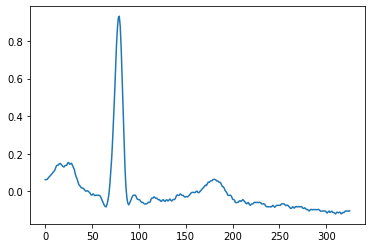

In [14]:
plt.plot(x_axis, beats[8])

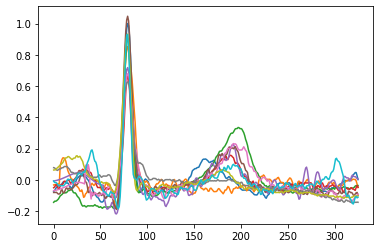

In [8]:
for i in range(10):
    plt.plot(x_axis, beats[i])

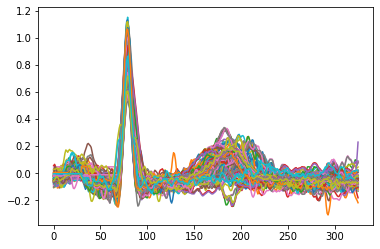

In [25]:
for i in range(100):
    plt.plot(x_axis, res[i])

In [55]:
def remove_buffed_beats(beats):
    avgs = []
    others = []
    for beat in beats:
        if not is_buffered(beat):
            avgs.append(beat)
        else:
            others.append(beat)
    return np.array(avgs).mean(axis=0), np.array(others), np.array(avgs)
    
def is_buffered(beat):
    if beat[0:5].sum() == 0:
        return True
    return False

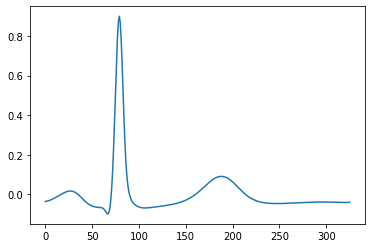

In [62]:
average, buffered, normal = remove_buffed_beats(beats)
plt.plot(x_axis, average)

In [57]:
normal.shape

(474606, 326)

In [64]:
for beat in buffered:
    end = False
    i = 0
    while (not end):
        if beat[i] != 0:
            end = True
        else:
            beat[i] = average[i]
        i += 1

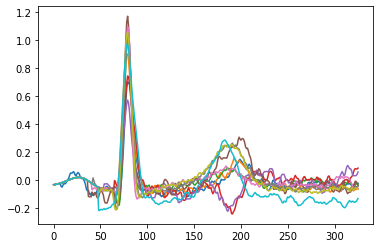

In [65]:
for i in range(10):
    plt.plot(x_axis, buffered[i])

In [74]:
#Combine the buffered which now has zeros filled with averages, and normal beats
full_beats = np.concatenate((buffered, normal))
#Normalize them as we did before which reduces outliers
normalized = np.apply_along_axis(normalize_beat, 1, full_beats)
#Randomize them for training
np.random.shuffle(normalized)

In [73]:
normalized.shape

(616582, 326)

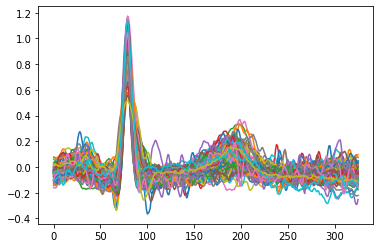

In [80]:
for i in range(100):
    plt.plot(x_axis, normalized[i])

In [78]:
np.save('Heartbeats_normalized.npy', np.array(normalized))